               author                  date  \
0        Chhavi Tyagi  03 Aug 2017,Thursday   
1         Daisy Mowke  03 Aug 2017,Thursday   
2      Arshiya Chopra  03 Aug 2017,Thursday   
3       Sumedha Sehra  03 Aug 2017,Thursday   
4  Aarushi Maheshwari  03 Aug 2017,Thursday   

                                           headlines  \
0  Daman & Diu revokes mandatory Rakshabandhan in...   
1  Malaika slams user who trolled her for 'divorc...   
2  'Virgin' now corrected to 'Unmarried' in IGIMS...   
3  Aaj aapne pakad liya: LeT man Dujana before be...   
4  Hotel staff to get training to spot signs of s...   

                                           read_more  \
0  http://www.hindustantimes.com/india-news/raksh...   
1  http://www.hindustantimes.com/bollywood/malaik...   
2  http://www.hindustantimes.com/patna/bihar-igim...   
3  http://indiatoday.intoday.in/story/abu-dujana-...   
4  http://indiatoday.intoday.in/story/sex-traffic...   

                                           

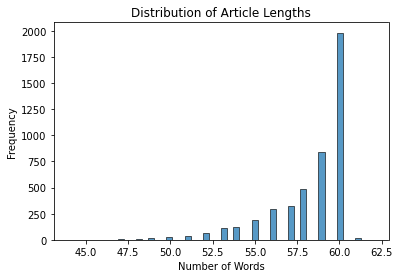

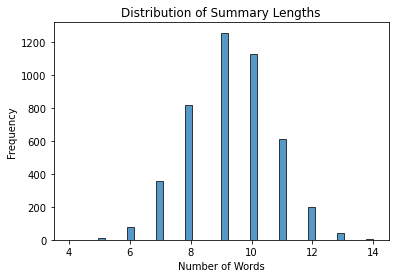

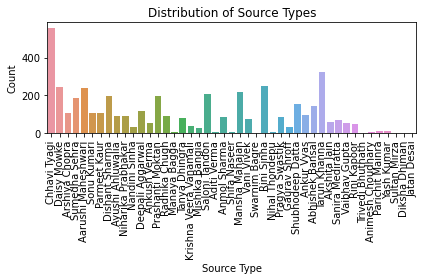

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('news_summary.csv', encoding='ISO-8859-1')

# Print the first five rows of the dataset
print(df.head())

# Print the shape of the dataset
print('Shape of the dataset:', df.shape)

# Print the columns of the dataset
print('Columns of the dataset:', df.columns)

# Check for missing values
print('Missing values in the dataset:\n', df.isnull().sum())

# Check for duplicates
print('Number of duplicate rows:', df.duplicated().sum())

# Print the summary statistics of the dataset
print(df.describe())

# Plot the distribution of article lengths
df['text_length'] = df['text'].apply(lambda x: len(x.split()))
sns.histplot(df['text_length'], kde=False)
plt.title('Distribution of Article Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of summary lengths
df['summary_length'] = df['headlines'].apply(lambda x: len(x.split()))
sns.histplot(df['summary_length'], kde=False)
plt.title('Distribution of Summary Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

sns.countplot(x='author', data=df)
plt.xticks(rotation=90, ha='center')
plt.title('Distribution of Source Types')
plt.xlabel('Source Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

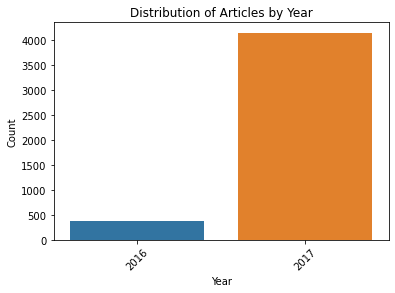

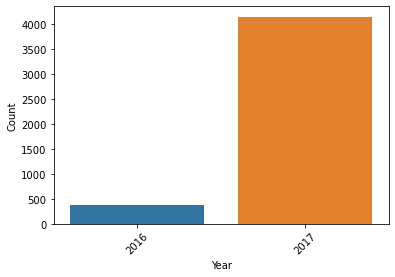

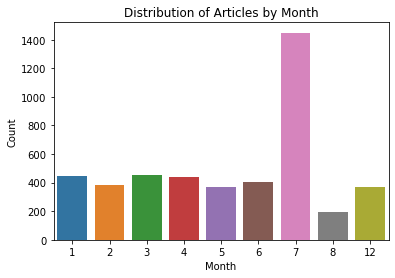

In [2]:
# Extract year and month from the date column
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

# Plot the distribution of articles and summaries by year
sns.countplot(x='year', data=df)
plt.xticks(rotation=45)
plt.title('Distribution of Articles by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

sns.countplot(x='year', data=df)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# Plot the distribution of articles and summaries by month
sns.countplot(x='month', data=df)
plt.title('Distribution of Articles by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

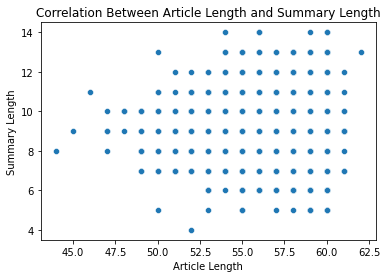

In [3]:
# Plot the correlation between article length and summary length
sns.scatterplot(x='text_length', y='summary_length', data=df)
plt.title('Correlation Between Article Length and Summary Length')
plt.xlabel('Article Length')
plt.ylabel('Summary Length')
plt.show()

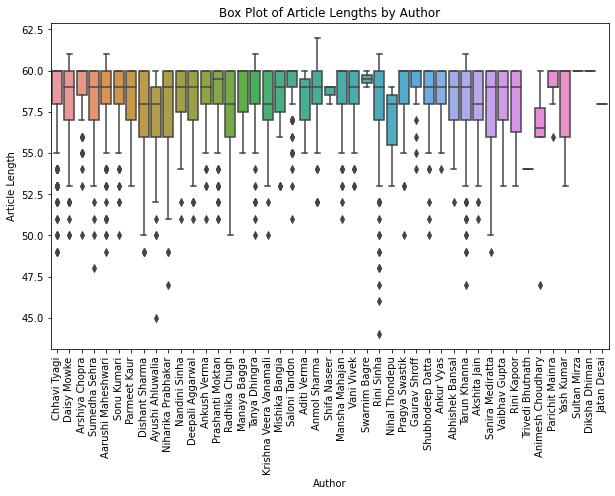

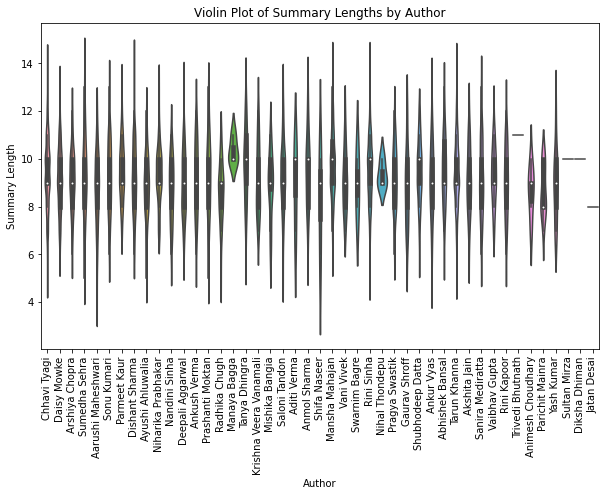

In [4]:
plt.figure(figsize=(10,6))
sns.boxplot(x='author', y='text_length', data=df)
plt.xticks(rotation=90)
plt.title('Box Plot of Article Lengths by Author')
plt.xlabel('Author')
plt.ylabel('Article Length')
plt.show()

plt.figure(figsize=(10,6))
sns.violinplot(x='author', y='summary_length', data=df)
plt.xticks(rotation=90)
plt.title('Violin Plot of Summary Lengths by Author')
plt.xlabel('Author')
plt.ylabel('Summary Length')
plt.show()


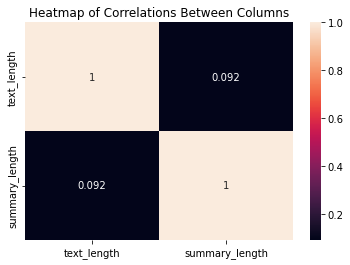

In [5]:
corr = df[['text_length', 'summary_length', 'author']].corr()
sns.heatmap(corr, annot=True)
plt.title('Heatmap of Correlations Between Columns')
plt.show()

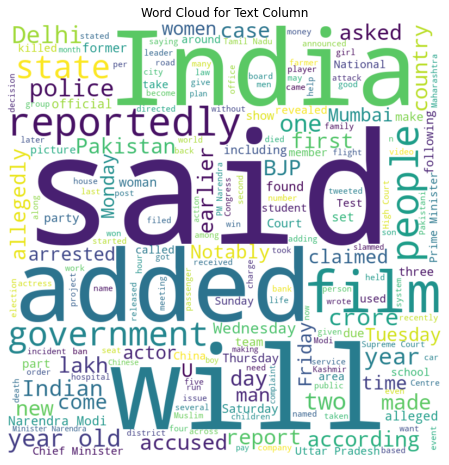

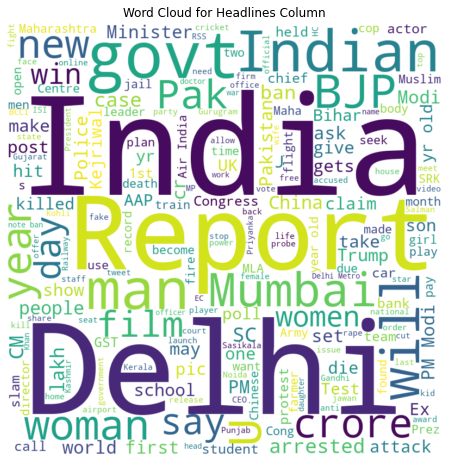

In [7]:
from wordcloud import WordCloud

# Generate word cloud for the text column
text = ' '.join(df['text'].tolist())
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Text Column')
plt.show()

# Generate word cloud for the headlines column
headlines = ' '.join(df['headlines'].tolist())
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(headlines)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Headlines Column')
plt.show()

In [38]:
import re
import string
import nltk
import pandas as pd
import spacy
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import T5Tokenizer, T5ForConditionalGeneration, BartTokenizer, BartForConditionalGeneration, GPT2Tokenizer, GPT2LMHeadModel
from rouge import Rouge

# Load the data
df = pd.read_csv('news_summary.csv', encoding='ISO-8859-1')
df = df[0:50]

# Load the tokenizer and model for T5
def generate_summary_t5(text):
    tokenizer = T5Tokenizer.from_pretrained('t5-small')
    model = T5ForConditionalGeneration.from_pretrained('t5-small')
    
    # Tokenize the article text
    inputs = tokenizer.encode("summarize: " + text, return_tensors='pt', max_length=512, truncation=True)

    # Generate the summary
    summary_ids = model.generate(inputs,
                                 num_beams=4,
                                 no_repeat_ngram_size=2,
                                 min_length=30,
                                 max_length=100,
                                 early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    return summary

# Load the tokenizer and model for BART
def generate_summary_bart(text):
    tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')
    model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')
    
    # Tokenize the article text
    inputs = tokenizer(text, max_length=1024, truncation=True, return_tensors='pt')

    # Generate the summary
    summary_ids = model.generate(inputs['input_ids'], num_beams=4, length_penalty=2.0, max_length=142, min_length=56, no_repeat_ngram_size=3)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    return summary

# Load the tokenizer and model for GPT-2
def generate_summary_gpt2(text):
    tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
    model = GPT2LMHeadModel.from_pretrained('gpt2')
    
    # Tokenize the article text
    inputs = tokenizer.encode(text, return_tensors='pt')

    # Generate the summary
    summary_ids = model.generate(inputs,
                                 max_length=1000,
                                 num_beams=4,
                                 no_repeat_ngram_size=2,
                                 early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    return summary

# Preprocess the text
nlp = spacy.load('en_core_web_sm')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove HTML tags and URLs
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'http\S+', '', text)
    
    # Tokenize the text using NLTK
    tokens = nltk.word_tokenize(text.lower())

    # Remove stopwords and punctuation
    tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]

    # Lemmatize the tokens using spaCy
    lemmas = [token.lemma_ for token in nlp(" ".join(tokens))]

    # Remove any remaining non-alphabetic tokens
    lemmas = [lemma for lemma in lemmas if lemma.isalpha()]

    # Join the lemmas back into a string
    text = " ".join(lemmas)

    return text






In [41]:
df['preprocessed_text'] = df['text'].apply(preprocess_text)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['preprocessed_text'])
summaries_t5 = []
for text in df['text']:
    summary = generate_summary_t5(text)
    summaries_t5.append(summary)
df['generated_summary_t5'] = summaries_t5
summaries_bart = []
for text in df['text']:
    summary = generate_summary_bart(text)
    summaries_bart.append(summary)
df['generated_summary_bart'] = summaries_bart
summaries_gpt2 = []
for text in df['text']:
    summary = generate_summary_gpt2(text)
    summaries_gpt2.append(summary)
df['generated_summary_gpt2'] = summaries_gpt2
rouge = Rouge()
rouge_scores_t5 = []
rouge_scores_bart = []
rouge_scores_gpt2 = []
for i in range(len(df)):
    reference = df['headlines'][i]
    summary = df['generated_summary_t5'][i]
    scores_summary = rouge.get_scores(summary, reference)
    rouge_scores_t5.append(scores_summary[0])    
df['rouge_scores_t5'] = rouge_scores_t5
for i in range(len(df)):
    reference = df['headlines'][i]
    summary = df['generated_summary_bart'][i]
    scores_summary = rouge.get_scores(summary, reference)
    rouge_scores_bart.append(scores_summary[0])    
df['rouge_scores_bart'] = rouge_scores_bart
for i in range(len(df)):
    reference = df['headlines'][i]
    summary = df['generated_summary_gpt2'][i]
    scores_summary = rouge.get_scores(summary, reference)
    rouge_scores_gpt2.append(scores_summary[0])    
df['rouge_scores_gpt2'] = rouge_scores_gpt2
mean_rouge_t5 = sum([score['rouge-1']['f'] for score in df['rouge_scores_t5']])/len(df)
mean_rouge_bart = sum([score['rouge-1']['f'] for score in df['rouge_scores_bart']])/len(df)
mean_rouge_gpt2 = sum([score['rouge-1']['f'] for score in df['rouge_scores_gpt2']])/len(df)

print("Mean ROUGE scores:")
print("T5:", mean_rouge_t5)
print("BART:", mean_rouge_bart)
print("GPT-2:", mean_rouge_gpt2)

C:\ProgramData\Anaconda3\lib\site-packages\transformers\models\t5\tokenization_t5.py:163: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-small automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gener

Mean ROUGE scores:
T5: 0.18962468690057446
BART: 0.19770931733775243
GPT-2: 0.15309382505728408


In [42]:
from nltk.translate.bleu_score import corpus_bleu

# Calculate BLEU scores for T5-generated summaries
references = [[headline.split()] for headline in df['headlines']]
summaries = [summary.split() for summary in df['generated_summary_t5']]
bleu_t5 = corpus_bleu(references, summaries)

# Calculate BLEU scores for BART-generated summaries
references = [[headline.split()] for headline in df['headlines']]
summaries = [summary.split() for summary in df['generated_summary_bart']]
bleu_bart = corpus_bleu(references, summaries)

# Calculate BLEU scores for GPT-2-generated summaries
references = [[headline.split()] for headline in df['headlines']]
summaries = [summary.split() for summary in df['generated_summary_gpt2']]
bleu_gpt2 = corpus_bleu(references, summaries)

print("BLEU scores:")
print("T5:", bleu_t5)
print("BART:", bleu_bart)
print("GPT-2:", bleu_gpt2)

BLEU scores:
T5: 0.022856325178481192
BART: 0.01950847739235876
GPT-2: 0.012188501945424611


In [43]:
import nltk

def calculate_f1_scores(df):
    nltk.download('punkt')
    summaries_t5 = df['generated_summary_t5']
    summaries_bart = df['generated_summary_bart']
    summaries_gpt2 = df['generated_summary_gpt2']
    reference_summaries = df['headlines']

    # Calculate F1 scores for T5
    f1_t5 = []
    for summary, reference in zip(summaries_t5, reference_summaries):
        f1 = nltk.translate.bleu_score.sentence_bleu([reference], summary, weights=(1, 0, 0, 0))
        f1_t5.append(f1)

    # Calculate F1 scores for BART
    f1_bart = []
    for summary, reference in zip(summaries_bart, reference_summaries):
        f1 = nltk.translate.bleu_score.sentence_bleu([reference], summary, weights=(1, 0, 0, 0))
        f1_bart.append(f1)

    # Calculate F1 scores for GPT-2
    f1_gpt2 = []
    for summary, reference in zip(summaries_gpt2, reference_summaries):
        f1 = nltk.translate.bleu_score.sentence_bleu([reference], summary, weights=(1, 0, 0, 0))
        f1_gpt2.append(f1)

    # Print the F1 scores
    print("F1 score for T5:", sum(f1_t5)/len(f1_t5))
    print("F1 score for BART:", sum(f1_bart)/len(f1_bart))
    print("F1 score for GPT-2:", sum(f1_gpt2)/len(f1_gpt2))
    return [f1_t5,f1_bart,f1_gpt2]

In [56]:
f1s = calculate_f1_scores(df)

F1 score for T5: 0.2945619740953616
F1 score for BART: 0.18573780398899126
F1 score for GPT-2: 0.11151585288385776


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kushi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


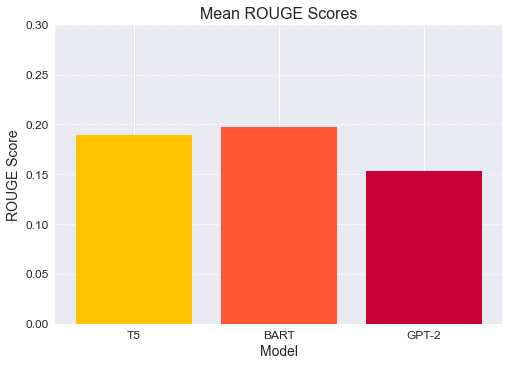

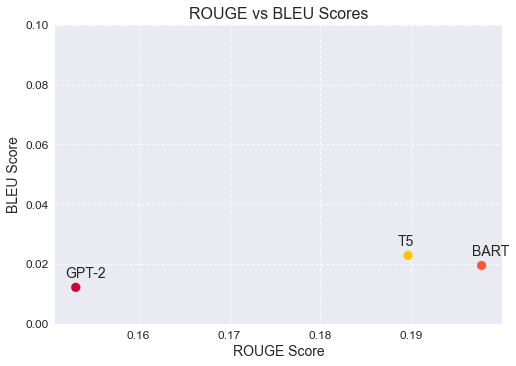

In [46]:
import matplotlib.pyplot as plt

# Styling
plt.style.use('seaborn')

# Bar plot for mean ROUGE scores
models = ['T5', 'BART', 'GPT-2']
mean_rouge_scores = [mean_rouge_t5, mean_rouge_bart, mean_rouge_gpt2]
plt.bar(models, mean_rouge_scores, color=['#FFC300', '#FF5733', '#C70039'])
plt.title('Mean ROUGE Scores', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('ROUGE Score', fontsize=14)
plt.ylim(0, 0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Scatter plot for BLEU scores
bleu_scores = [bleu_t5, bleu_bart, bleu_gpt2]
plt.figure()
plt.scatter(mean_rouge_scores, bleu_scores, s=80, color=['#FFC300', '#FF5733', '#C70039'])
plt.title('ROUGE vs BLEU Scores', fontsize=16)
plt.xlabel('ROUGE Score', fontsize=14)
plt.ylabel('BLEU Score', fontsize=14)
plt.ylim(0, 0.1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
for i, model in enumerate(models):
    plt.annotate(model, (mean_rouge_scores[i], bleu_scores[i]), fontsize=14, xytext=(-10, 10), textcoords='offset points')

plt.show()





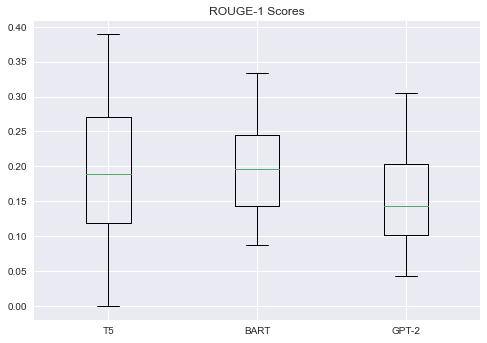

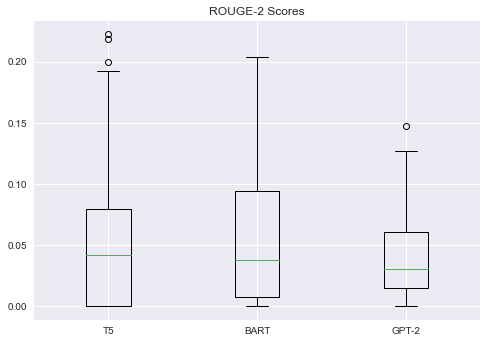

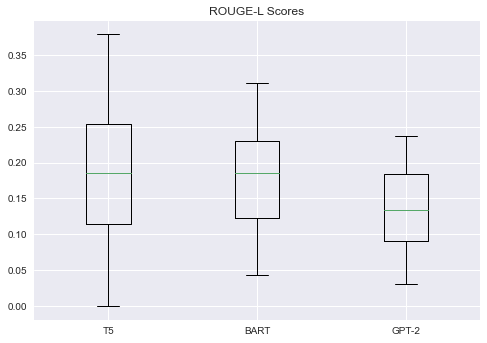

In [47]:
import matplotlib.pyplot as plt

# Extract ROUGE scores
rouge_1_scores_t5 = [score['rouge-1']['f'] for score in df['rouge_scores_t5']]
rouge_1_scores_bart = [score['rouge-1']['f'] for score in df['rouge_scores_bart']]
rouge_1_scores_gpt2 = [score['rouge-1']['f'] for score in df['rouge_scores_gpt2']]
rouge_2_scores_t5 = [score['rouge-2']['f'] for score in df['rouge_scores_t5']]
rouge_2_scores_bart = [score['rouge-2']['f'] for score in df['rouge_scores_bart']]
rouge_2_scores_gpt2 = [score['rouge-2']['f'] for score in df['rouge_scores_gpt2']]
rouge_l_scores_t5 = [score['rouge-l']['f'] for score in df['rouge_scores_t5']]
rouge_l_scores_bart = [score['rouge-l']['f'] for score in df['rouge_scores_bart']]
rouge_l_scores_gpt2 = [score['rouge-l']['f'] for score in df['rouge_scores_gpt2']]

# Create box plots
plt.boxplot([rouge_1_scores_t5, rouge_1_scores_bart, rouge_1_scores_gpt2])
plt.xticks([1, 2, 3], ['T5', 'BART', 'GPT-2'])
plt.title('ROUGE-1 Scores')
plt.show()

plt.boxplot([rouge_2_scores_t5, rouge_2_scores_bart, rouge_2_scores_gpt2])
plt.xticks([1, 2, 3], ['T5', 'BART', 'GPT-2'])
plt.title('ROUGE-2 Scores')
plt.show()

plt.boxplot([rouge_l_scores_t5, rouge_l_scores_bart, rouge_l_scores_gpt2])
plt.xticks([1, 2, 3], ['T5', 'BART', 'GPT-2'])
plt.title('ROUGE-L Scores')
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kushi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


F1 score for T5: 0.2945619740953616
F1 score for BART: 0.18573780398899126
F1 score for GPT-2: 0.11151585288385776


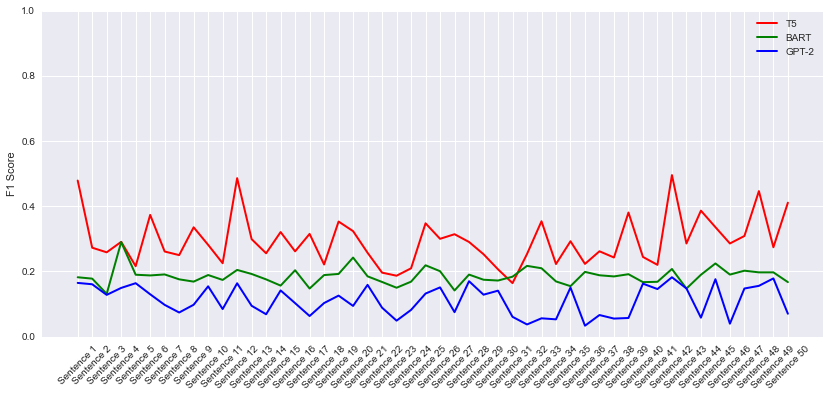

In [55]:
import matplotlib.pyplot as plt


f1_scores = calculate_f1_scores(df)
models = ['T5', 'BART', 'GPT-2']
colors = ['r', 'g', 'b']

    # create a figure and axis
fig, ax = plt.subplots(figsize=(14, 6))

    # plot the lines
for i, model in enumerate(models):
    ax.plot(f1_scores[i], label=model, color=colors[i], linewidth=2)

    # set the x-axis labels
ax.set_xticks(range(len(f1_scores[0])))
ax.set_xticklabels([f'Sentence {i+1}' for i in range(len(f1_scores[0]))], rotation=45)

    # set the y-axis label and limits
ax.set_ylabel('F1 Score')
ax.set_ylim(0, 1)

    # add a legend
ax.legend()

    # show the plot
plt.show()

In [58]:
df= df.drop(['ctext'], axis=1)

In [60]:
df.head()

,author,date,headlines,read_more,text,preprocessed_text,generated_summary_t5,generated_summary_bart,generated_summary_gpt2,rouge_scores_t5,rouge_scores_bart,rouge_scores_gpt2
0,Chhavi Tyagi,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in...,http://www.hindustantimes.com/india-news/raksh...,The Administration of Union Territory Daman an...,administration union territory daman diu revok...,the order made it compulsory for women to tie ...,The Administration of Union Territory Daman an...,The Administration of Union Territory Daman an...,"{'rouge-1': {'r': 0.2222222222222222, 'p': 0.1...","{'rouge-1': {'r': 0.3333333333333333, 'p': 0.0...","{'rouge-1': {'r': 0.4444444444444444, 'p': 0.0..."
1,Daisy Mowke,"03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorc...,http://www.hindustantimes.com/bollywood/malaik...,Malaika Arora slammed an Instagram user who tr...,malaika arora slammed instagram user troll div...,malaika Arora slams an Instagram user who trol...,Malaika Arora slammed an Instagram user who tr...,Malaika Arora slammed an Instagram user who tr...,"{'rouge-1': {'r': 0.7, 'p': 0.1944444444444444...","{'rouge-1': {'r': 0.7, 'p': 0.1372549019607843...","{'rouge-1': {'r': 0.7, 'p': 0.125, 'f': 0.2121..."
2,Arshiya Chopra,"03 Aug 2017,Thursday",'Virgin' now corrected to 'Unmarried' in IGIMS...,http://www.hindustantimes.com/patna/bihar-igim...,The Indira Gandhi Institute of Medical Science...,indira gandhi institute medical sciences igim ...,the indiana Gandhi institute of medical scienc...,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...,"{'rouge-1': {'r': 0.25, 'p': 0.090909090909090...","{'rouge-1': {'r': 0.375, 'p': 0.0625, 'f': 0.1...","{'rouge-1': {'r': 0.625, 'p': 0.09090909090909..."
3,Sumedha Sehra,"03 Aug 2017,Thursday",Aaj aapne pakad liya: LeT man Dujana before be...,http://indiatoday.intoday.in/story/abu-dujana-...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,lashkar e taiba kashmir commander abu dujana k...,kabhi hum aage was killed by security forces. ...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,"{'rouge-1': {'r': 0.1, 'p': 0.0322580645161290...","{'rouge-1': {'r': 0.4, 'p': 0.1379310344827586...","{'rouge-1': {'r': 0.4, 'p': 0.0701754385964912..."
4,Aarushi Maheshwari,"03 Aug 2017,Thursday",Hotel staff to get training to spot signs of s...,http://indiatoday.intoday.in/story/sex-traffic...,Hotels in Maharashtra will train their staff t...,hotels maharashtra train staff spot sign sex t...,hotels in Maharashtra will train staff to spot...,Hotels in Maharashtra will train their staff t...,Hotels in Maharashtra will train their staff t...,"{'rouge-1': {'r': 0.7, 'p': 0.1707317073170731...","{'rouge-1': {'r': 0.7, 'p': 0.1555555555555555...","{'rouge-1': {'r': 0.6, 'p': 0.1153846153846153..."
